### Loading the MNIST data

In [1]:
# MIST comes pre-loaded with TensorFlow, you can download it suing the foloowing command
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### How does this data set looks like?

label for this image: 4
image size 784
10


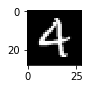

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print("label for this image: {}".format(y_train[index]))

img_shape = (X_train[0].shape[0], X_train[0].shape[1])
img_size_flat = (img_shape[0] * img_shape[1])
print ("image size {}" .format(img_size_flat))

num_classes = len(np.unique(y_train))
print(num_classes)

### Architecture
For this arquitecure I would be using one neuron 

In [3]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
tf.reset_default_graph()

#Placeholder variables
x = tf.placeholder(tf.float32, (None, img_shape[0], img_shape[1], 1))
y = tf.placeholder(tf.int32, (None))

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

def model(x):
    fc   = flatten(x)
    logits = tf.matmul(fc, weights) + biases
    return logits

In [4]:
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

one_hot_y = tf.one_hot(y, num_classes)

# Get logits
logits = model(x)

y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

# Computes softmax cross entropy between logits and labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
#Calculate loss
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [5]:
#set validation system 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, sess):
    num_examples = len(X_data)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Start tensorflow training session

In [6]:
import time

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

def train():
    beginTime = time.time()
    for offset in range(0, len(X_train), BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

    validation_accuracy = evaluate(X_validation, y_validation, sess)        
    endTime = time.time()
    print ("Total time {:5.2f}s accuracy:{}".format(endTime - beginTime, validation_accuracy))

## This is a helper-function to plot the model weights
As you plug the weights back into an image you can see one for each digit that the model is trained to recognize.Individual weights represent the strength of connections between units. If the weight from unit A to unit B has a greater magnitude (all else being equal), it means that A has greater influence over B (i.e. to increase or decrease B's level of activation).

Apart from the placeholder variables that were defined above and which serve as feeding input data into the model, there are also some model variables that must be changed by TensorFlow so as to make the model perform better on the training data.

w = sess.run(weights)
"weights" is a TensorFlow variable we initilize at the begging of our code. For this example "weights" were initialized with zeros and in a 2-dimensional tensor (or matrix) with img_size_flat rows and num_classes columns. Because we still have the training seesion open we can accces to it after one EPOCH and see how much it was change. 

In [7]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = sess.run(weights)
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    print(w_min)
    print(w_max)
    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Total time  0.40s accuracy:0.897
-0.245477
0.206278


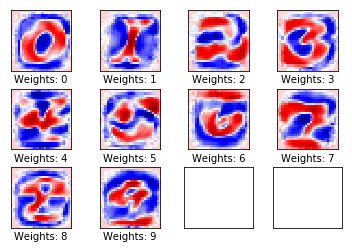

In [8]:
train()
plot_weights()

### How does weight change with more training?
Early units receive weighted connections from input pixels. The activation of each unit is a weighted sum of pixel intensity values, passed through an activation function. Because the activation function is monotonic, a given unit's activation will be higher when the input pixels are similar to the incoming weights of that unit (in the sense of having a large dot product). So, you can think of the weights as a set of filter coefficients, defining an image feature. For units in higher layers (in a feedforward network), the inputs aren't from pixels anymore, but from units in lower layers. So, the incoming weights are more like 'preferred input patterns'.

Total time  0.40s accuracy:0.9104
Total time  0.37s accuracy:0.9158
Total time  0.37s accuracy:0.9184
Total time  0.37s accuracy:0.9204
Total time  0.37s accuracy:0.9226
Total time  0.37s accuracy:0.924
Total time  0.37s accuracy:0.9248
Total time  0.37s accuracy:0.9264
Total time  0.37s accuracy:0.926
Total time  0.37s accuracy:0.926
-1.1957
1.07317


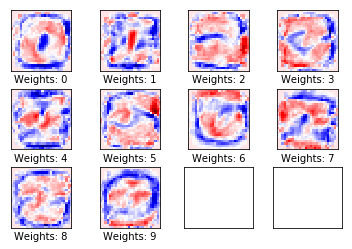

In [9]:
for i in range (10):
    train()
plot_weights()